# Análisis predictivo de series temporales

-----

## Modelos de media móvil

In [1]:
#install.packages("devtools")     # only need to do this once
#devtools::install_github("nickpoison/astsa")
install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas


Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jpmunoz\AppData\Local\Temp\RtmpgLP0Gb\downloaded_packages


Warning message:
"package 'astsa' was built under R version 3.6.3"

In [70]:
library(forecast)
library(lmtest)

## Ejercicio

Analizar la serie de grosor glacial del paquete `astsa` (serie `varve`). Aplicar la transformación `diff(log(x))` para obtener una serie estacionaria y discutir el ajuste de un modelo $MA(q)$ y $AR(p,q)$. 

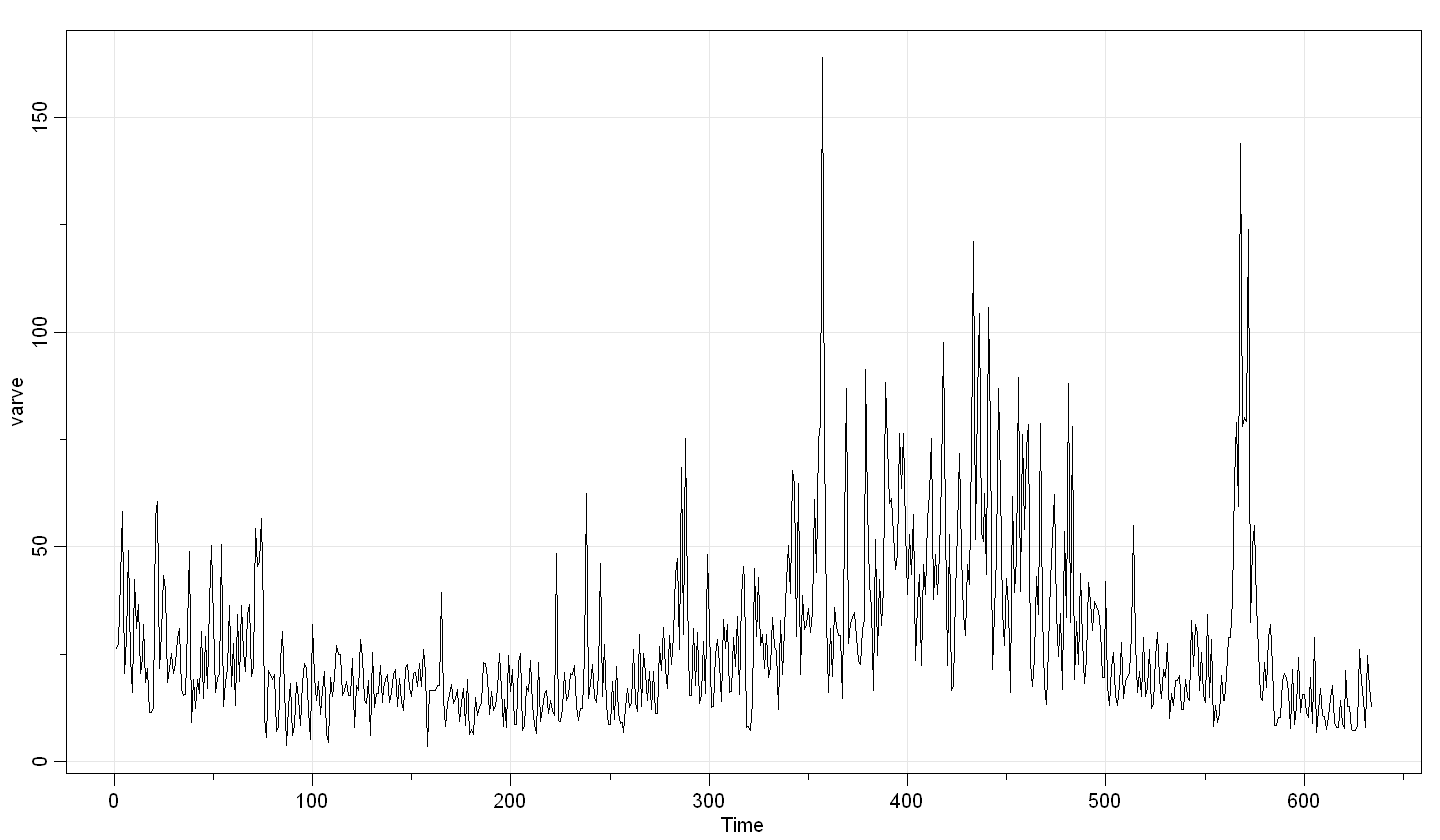

In [4]:
tsplot(varve)

In [5]:
head(varve)

[1] 26.28 27.42 42.28 58.28 20.57 28.57

In [38]:

x = diff(log(varve))
head(x)

[1]  0.04246448  0.43304149  0.32094482 -1.04142528  0.32852351  0.54231615

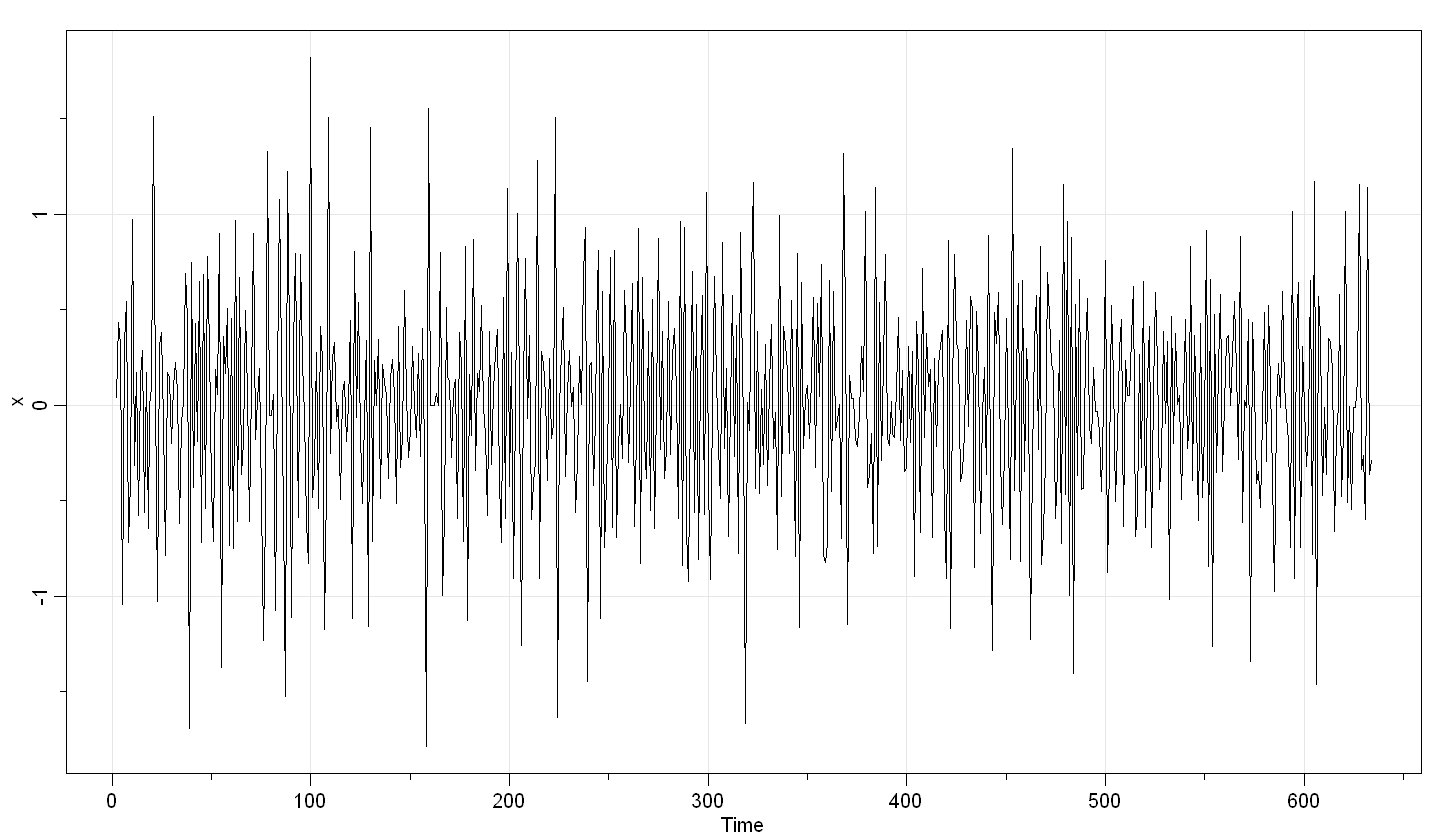

In [39]:
tsplot(x)

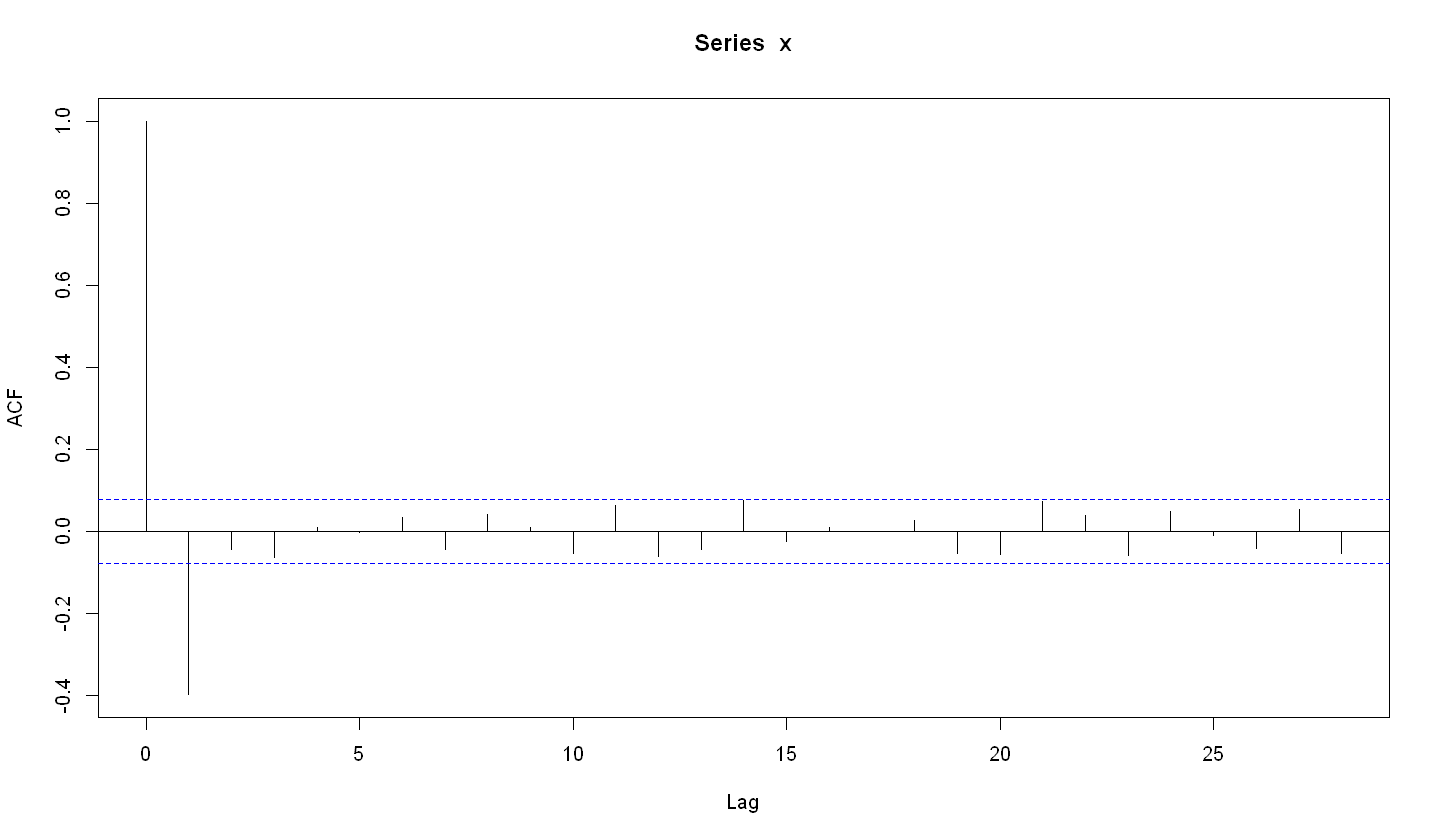

In [40]:
acf(x)

$Observaciòn:$ Analizando a simple vista la autocorrelaciòn de la serie se puede decir que tiene una Media movil de orden 1. 
>  $\{x_t\}$ es una media móvil de orden $1$ o $MA(1)$ :
>
> $$ x_t = w_t - 0.4 w_{t-1}  $$

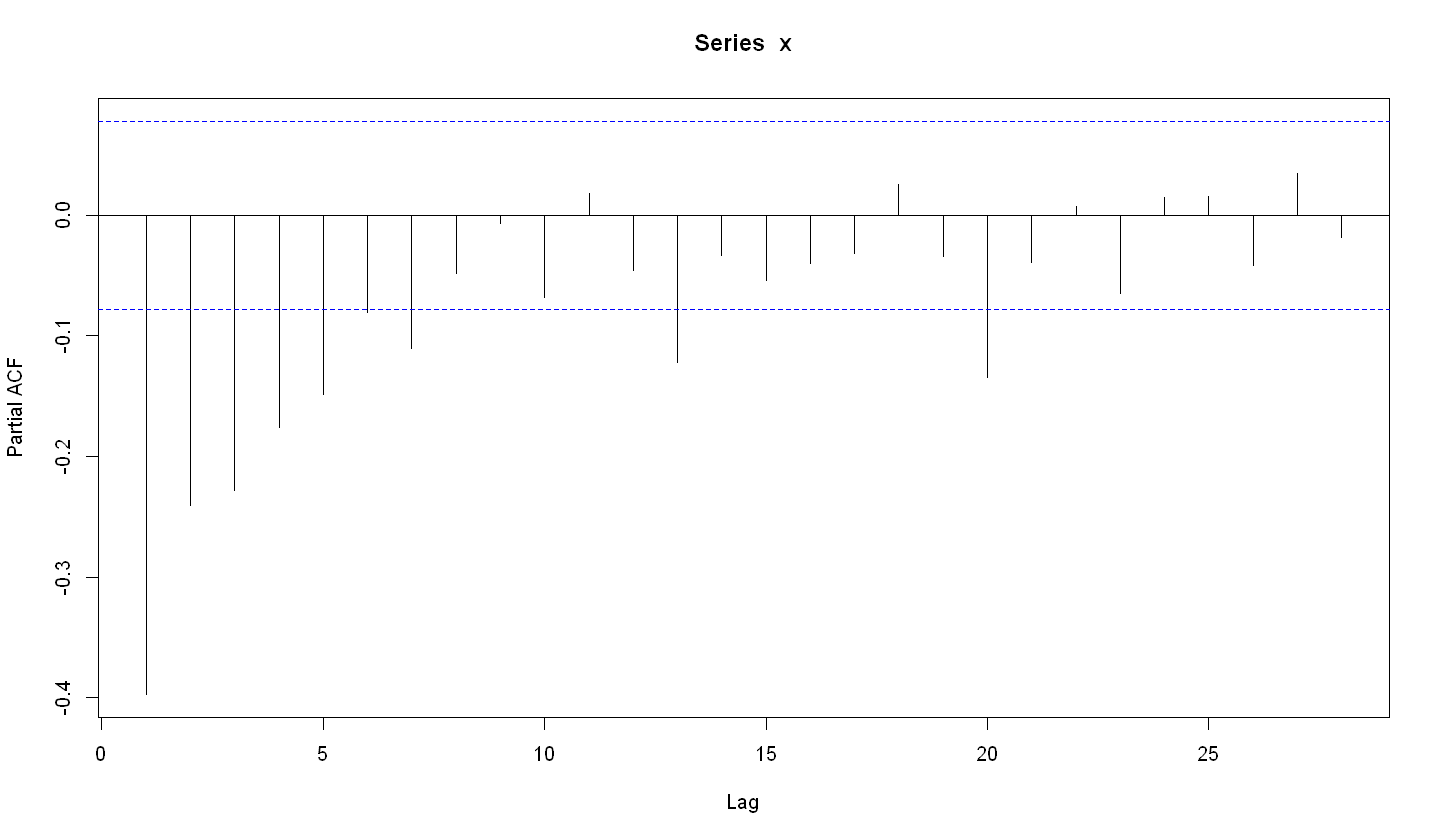

In [41]:
pacf(x)

$Observaciòn:$ Analizando la autocorrelaciòn parial de la serie se puede decir que tiene un componente autorregresivo de orden 4. 
>  $\{x_t\}$ es una autorregresivo de orden $4$ o $AR(4)$ :
>
> $$x_{t} = \phi_1 x_{t-1} + \phi_2 x_{t-2} +\phi_3 x_{t-3} +\phi_4 x_{t-4}  + w_t.$$

In [26]:
rho=acf(x,1,plot=F)
r=rho$acf[2]
r
theta = (1-sqrt(1-4*r^2))/(2*r)
theta
rho

[1] -0.3066077

[1] -0.3425946


Autocorrelations of series 'x', by lag

     0      1 
 1.000 -0.307 

In [29]:
# Estimo la varianza del ruido por método de los momentos, despejando (debería dar 1 en este caso).

var(x)/(1+theta^2)

[1] 1.14979

In [45]:
head(x)
x = ts(x)

[1] -0.6457995 -1.5591059 -2.1219950 -2.5828800 -2.4476436 -2.0054857

In [72]:
fit1 = Arima(x , order = c(0,0,1)) #Autorregresivo de orden 0 y Media mòvil de orden 1
summary(fit1)
coeftest(fit1)
AIC(fit1)
fit1$sigma2


Series: x 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1     mean
      0.9998  -0.0006
s.e.  0.0011   0.0284

sigma^2 estimated as 1.01:  log likelihood=-7121.72
AIC=14249.43   AICc=14249.44   BIC=14268.98

Training set error measures:
                        ME     RMSE       MAE      MPE    MAPE      MASE
Training set -0.0002288993 1.004657 0.8009257 75.37015 250.152 0.7098661
                     ACF1
Training set -0.003922518



z test of coefficients:

             Estimate  Std. Error  z value Pr(>|z|)    
ma1        0.99977246  0.00113282 882.5549   <2e-16 ***
intercept -0.00055262  0.02840992  -0.0195   0.9845    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 14249.43

[1] 1.009739

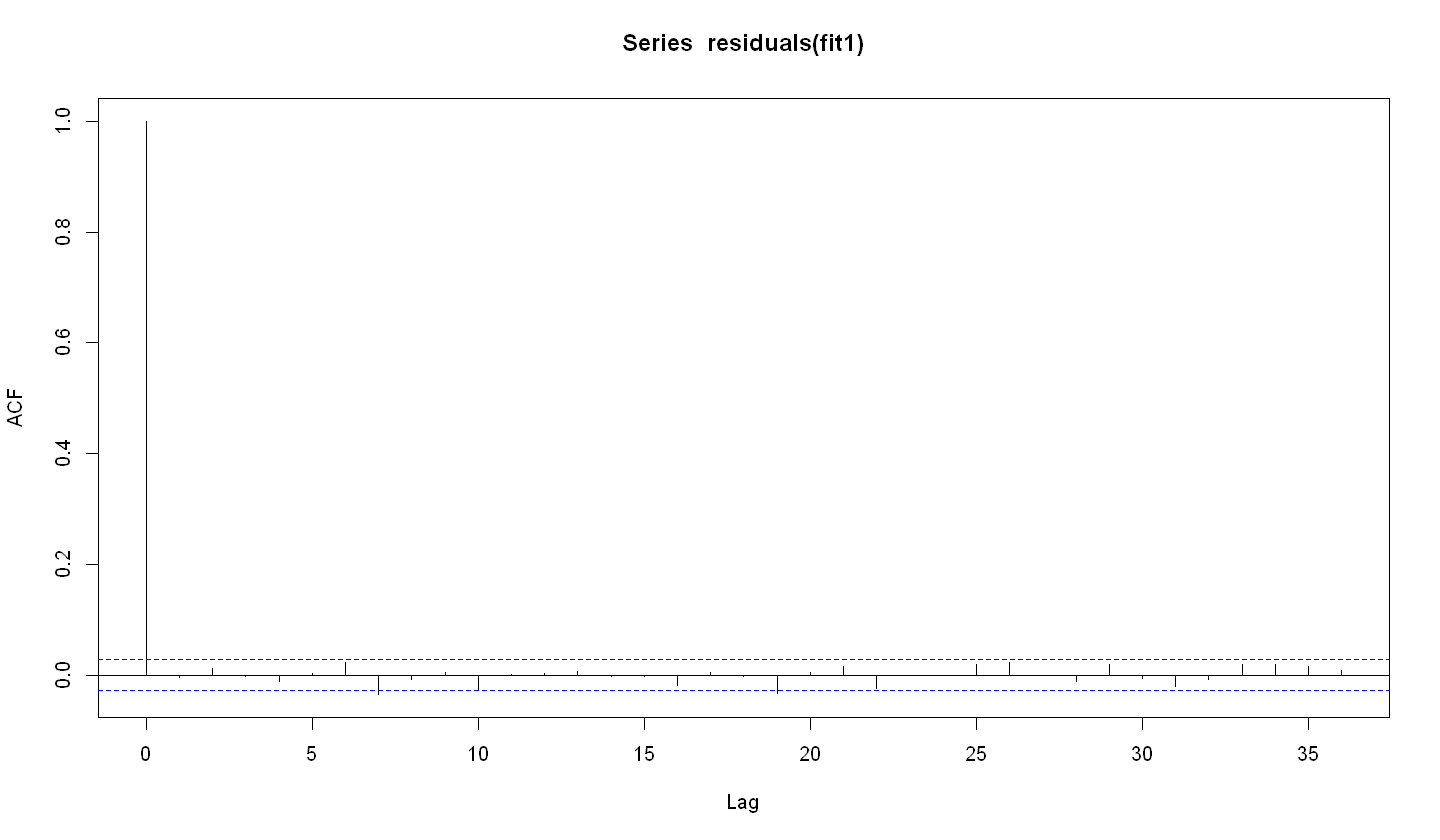

In [54]:
acf(residuals(fit1))

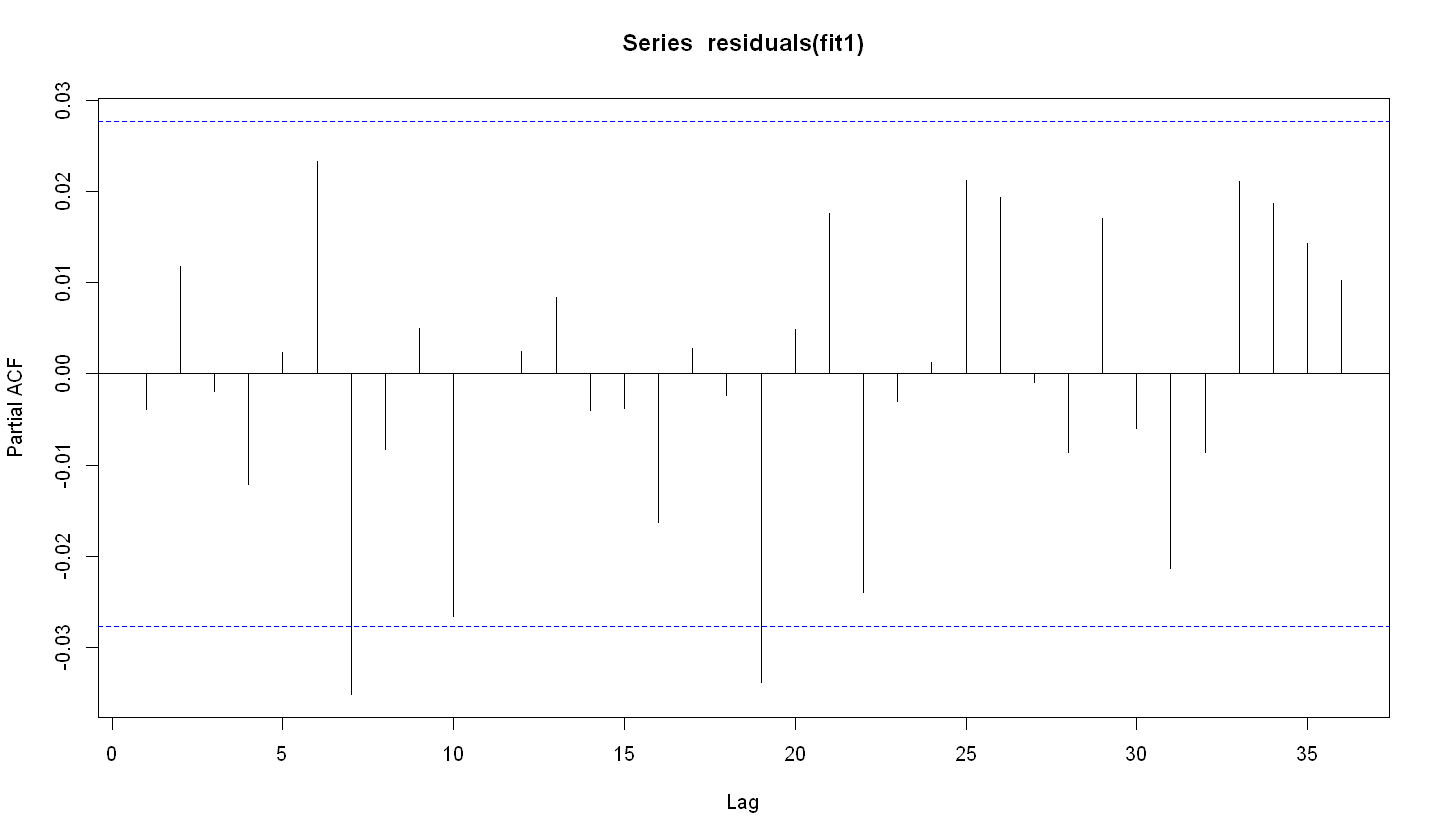

In [55]:
pacf(residuals(fit1))

In [73]:
fit2 = Arima(x , c(5,0,1)) #Autorregresivo de orden 5 y Media mòvil de orden 1
summary(fit2)
coeftest(fit2)
AIC(fit2)
fit2$sigma2

Series: x 
ARIMA(5,0,1) with non-zero mean 

Coefficients:
          ar1     ar2      ar3      ar4     ar5     ma1     mean
      -0.0041  0.0122  -0.0022  -0.0119  0.0022  0.9998  -0.0010
s.e.   0.0141  0.0141   0.0141   0.0141  0.0142  0.0011   0.0283

sigma^2 estimated as 1.01:  log likelihood=-7120.93
AIC=14257.87   AICc=14257.9   BIC=14310.01

Training set error measures:
                       ME    RMSE       MAE      MPE     MAPE      MASE
Training set 5.293663e-06 1.00449 0.8005816 74.74322 250.1856 0.7095611
                     ACF1
Training set 0.0001571115



z test of coefficients:

            Estimate Std. Error  z value Pr(>|z|)    
ar1       -0.0040650  0.0141441  -0.2874   0.7738    
ar2        0.0121782  0.0141427   0.8611   0.3892    
ar3       -0.0021866  0.0141442  -0.1546   0.8771    
ar4       -0.0118919  0.0141470  -0.8406   0.4006    
ar5        0.0021909  0.0141510   0.1548   0.8770    
ma1        0.9998030  0.0011279 886.4053   <2e-16 ***
intercept -0.0010220  0.0282990  -0.0361   0.9712    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


[1] 14257.87

[1] 1.010415

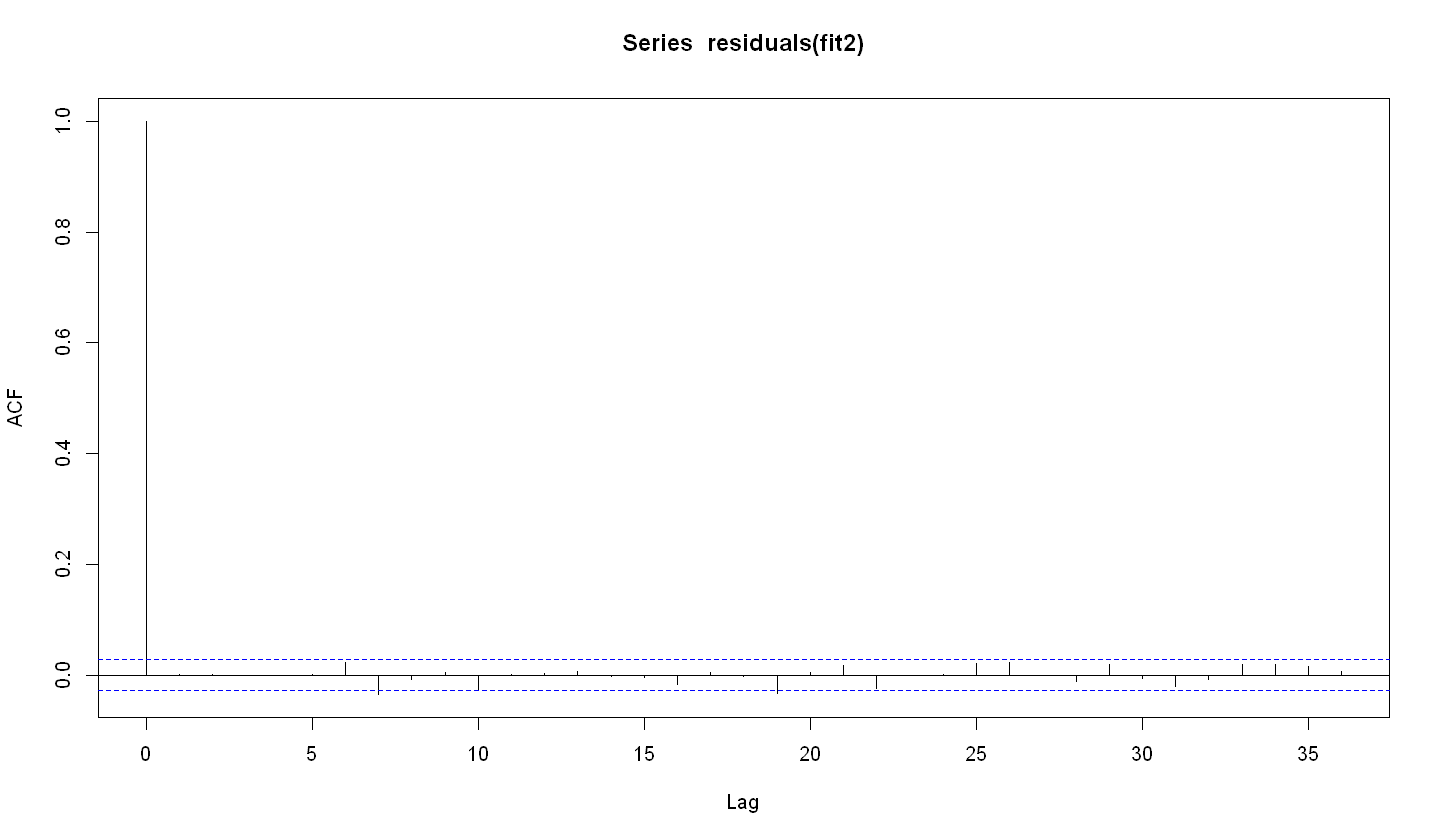

In [64]:
acf(residuals(fit2))

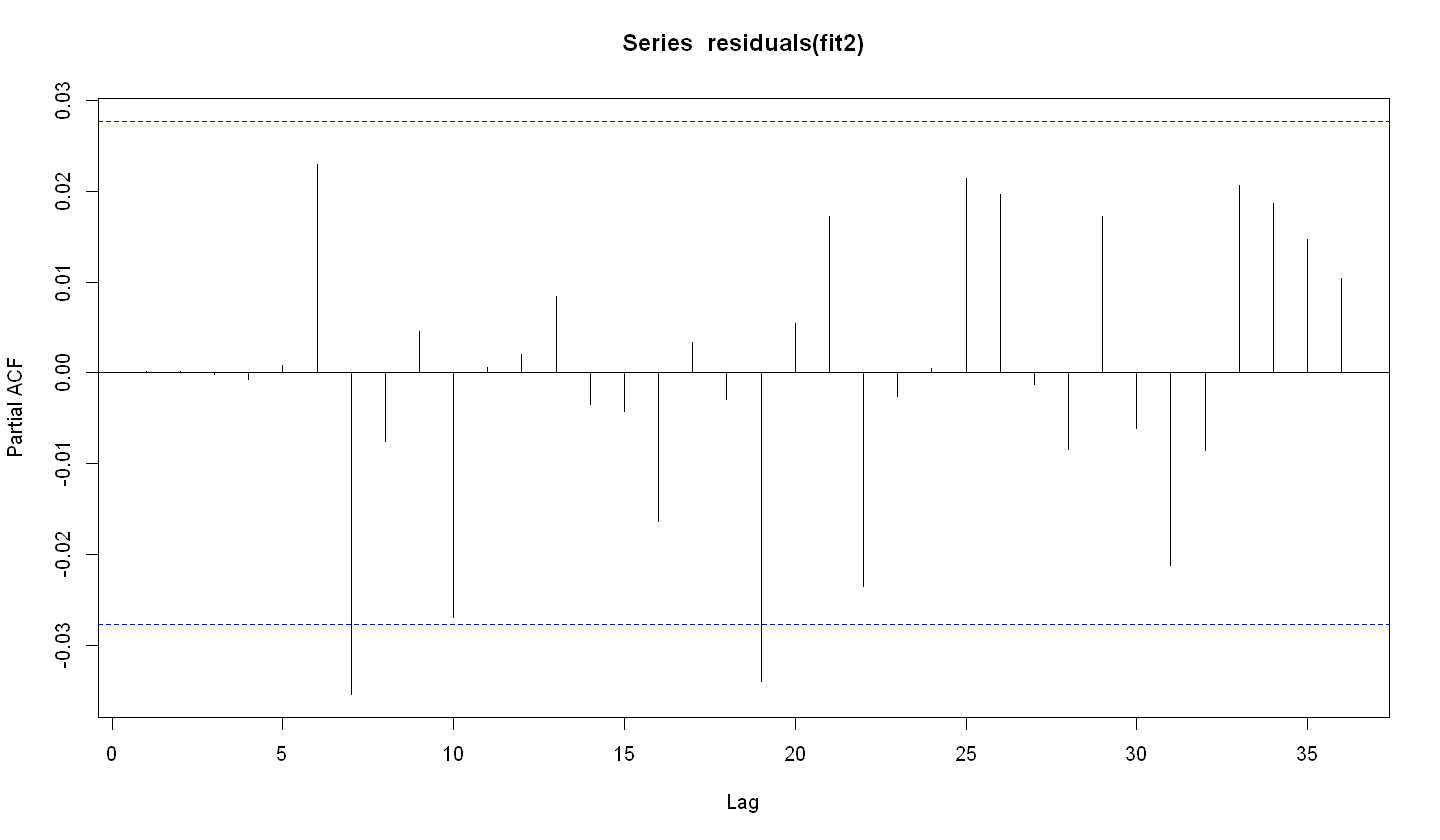

In [65]:
pacf(residuals(fit2))

$Observaciòn:$ Despues de analizar la serie por medio de diferentes ajstes con los distinctos componentes, AR y MA, por medio de los coeficientes significativos y e valr del AIC. podemos decir que el modelo qe mejor se ajusta a la serie es una Media movil de orden 1. 
>  $\{x_t\}$ es una media móvil de orden $1$ o $MA(1)$ :
>
> $$ x_t = w_t - 0.34 w_{t-1}  $$